### Part One - Exploratory data analys

In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as d
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline

In [2]:
logins = pd.read_json('logins.json')

In [3]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [4]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
logins2 = logins
logins2['count'] = 0

In [6]:
logins2 = logins2.set_index('login_time').groupby(pd.TimeGrouper('900s')).count()

In [7]:
logins2 = logins2.reset_index()

In [8]:
index = logins2.index.values.astype(str)

In [9]:
logins2.reset_index(index)

/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:3055: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if level is None or i in level:


,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
5,1970-01-01 21:15:00,4
6,1970-01-01 21:30:00,0
7,1970-01-01 21:45:00,4
8,1970-01-01 22:00:00,9
9,1970-01-01 22:15:00,8


In [10]:
logins2.columns

Index(['login_time', 'count'], dtype='object')

In [11]:
logins2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 2 columns):
login_time    9788 non-null datetime64[ns]
count         9788 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 153.0 KB


In [12]:
df = pd.DataFrame({'my_dates':['2015-01-01','2015-01-02','2015-01-03'],'myvals':[1,2,3]})
df['my_dates'] = pd.to_datetime(df['my_dates'])
df['day_of_week'] = df['my_dates'].dt.weekday_name

In [13]:
type(df['my_dates'][1])

pandas._libs.tslib.Timestamp

In [14]:
type(logins2['login_time'][1])

pandas._libs.tslib.Timestamp

In [15]:
logins2['date_num'] = d.date2num(list(pd.to_datetime(logins2.login_time)))
logins2['day_of_week'] = logins2['login_time'].dt.weekday_name
logins2['day_week_num'] = logins2['login_time'].dt.weekday
logins2['month'] = logins2['login_time'].apply(
    lambda x: x.strftime("%B"))
logins2['time'] = logins2['login_time'].dt.time
logins2['time'] = logins2['time'].apply(
lambda x: datetime.strptime(str(x), '%H:%M:%S').strftime('%I:%M %p'))
logins2['week'] = logins2['login_time'].dt.week

In [83]:
logins2['day_of_week'] = logins2['login_time'].dt.weekday_name

In [84]:
logins2['day_week_num'] = logins2['login_time'].dt.weekday

In [85]:
logins2['month'] = logins2['login_time'].apply(
    lambda x: x.strftime("%B"))

In [86]:
logins2['time'] = logins2['login_time'].dt.time

In [20]:
logins2['time'] = logins2['time'].apply(
lambda x: datetime.strptime(str(x), '%H:%M:%S').strftime('%I:%M %p'))

In [21]:
logins2['time'] = logins2['login_time'].dt.time

In [22]:
logins2['week'] = logins2['login_time'].dt.week

In [23]:
logins2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 8 columns):
login_time      9788 non-null datetime64[ns]
count           9788 non-null int64
date_num        9788 non-null float64
day_of_week     9788 non-null object
day_week_num    9788 non-null int64
month           9788 non-null object
time            9788 non-null object
week            9788 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 611.8+ KB


In [24]:
logins2.head()

,login_time,count,date_num,day_of_week,day_week_num,month,time,week
0,1970-01-01 20:00:00,2,719163.833333,Thursday,3,January,20:00:00,1
1,1970-01-01 20:15:00,6,719163.843750,Thursday,3,January,20:15:00,1
2,1970-01-01 20:30:00,9,719163.854167,Thursday,3,January,20:30:00,1
3,1970-01-01 20:45:00,7,719163.864583,Thursday,3,January,20:45:00,1
4,1970-01-01 21:00:00,1,719163.875000,Thursday,3,January,21:00:00,1


In [25]:
week_count = logins2.groupby('week')['count'].sum()

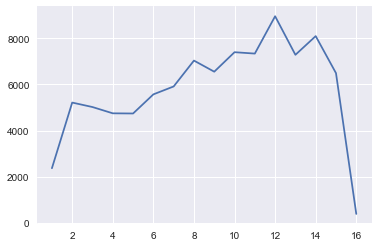

In [26]:
type(week_count)
plt.plot(week_count.index, week_count)
plt.show()

In [27]:
day_week_count = logins2.groupby('day_of_week')['count'].sum()
dwc_df = pd.DataFrame(day_week_count)
dwc = dwc_df.reset_index()

dwc

,day_of_week,count
0,Friday,15208
1,Monday,8823
2,Saturday,19377
3,Sunday,18167
4,Thursday,11960
5,Tuesday,9268
6,Wednesday,10339


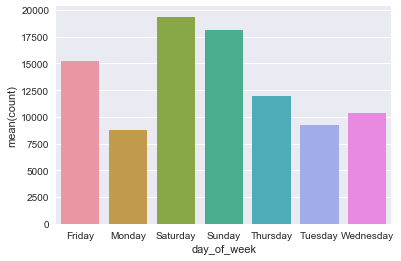

In [28]:
sns.barplot(x='day_of_week', y='count', data=dwc)
plt.show()

In [29]:
mo_count = logins2.groupby('month')['count'].sum()
mo_df = pd.DataFrame(mo_count)
mo = mo_df.reset_index()
mo

,month,count
0,April,13507
1,February,24673
2,January,21239
3,March,33723


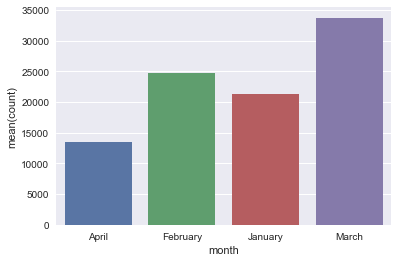

In [30]:
sns.barplot(x='month', y='count', data=mo)
plt.show()

In [87]:
time = logins2.groupby('time')['count'].sum()
time

time
00:00:00    1439
00:15:00    1547
00:30:00    1525
00:45:00    1482
01:00:00    1549
01:15:00    1598
01:30:00    1673
01:45:00    1497
02:00:00    1509
02:15:00    1526
02:30:00    1429
02:45:00    1336
03:00:00    1275
03:15:00    1302
03:30:00    1162
03:45:00    1092
04:00:00    1132
04:15:00    1164
04:30:00    1334
04:45:00    1404
05:00:00    1173
05:15:00     770
05:30:00     545
05:45:00     457
06:00:00     369
06:15:00     320
06:30:00     235
06:45:00     214
07:00:00     219
07:15:00     229
            ... 
16:30:00     700
16:45:00     714
17:00:00     637
17:15:00     612
17:30:00     644
17:45:00     691
18:00:00     697
18:15:00     690
18:30:00     767
18:45:00     826
19:00:00     768
19:15:00     744
19:30:00     842
19:45:00     881
20:00:00     849
20:15:00     970
20:30:00    1069
20:45:00    1215
21:00:00    1252
21:15:00    1325
21:30:00    1492
21:45:00    1554
22:00:00    1634
22:15:00    1652
22:30:00    1684
22:45:00    1637
23:00:00    1573
23:15:00 

In [91]:
type(time[1])

numpy.int64

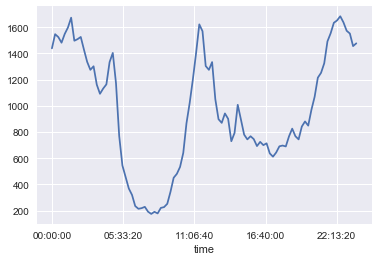

In [90]:
plt.plot(time)
plt.show()

In [33]:
# filters weekdays into groupings based on similar/unique characteristics
mon_thurs = logins2[logins2['day_week_num'] < 4]
fri = logins2[logins2['day_week_num'] == 4]
sat = logins2[logins2['day_week_num'] == 5]
sun = logins2[logins2['day_week_num'] == 6]

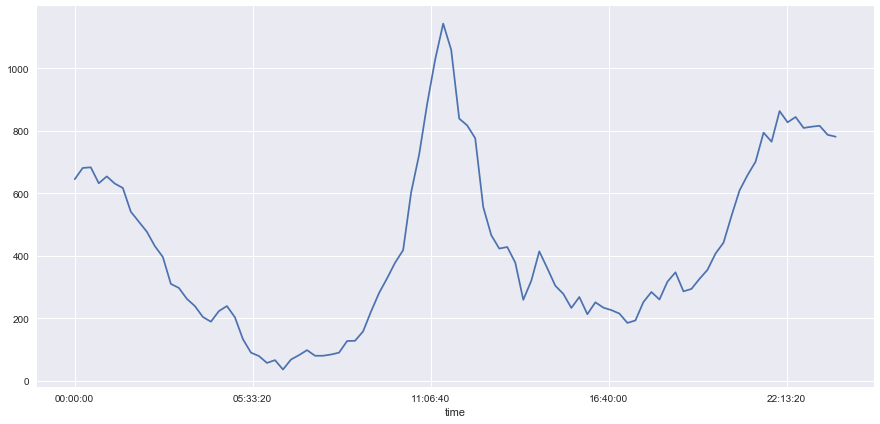

In [35]:
# average number of pickups per fifteen minute time period on Mon-Thurs
m_th_time =mon_thurs.groupby('time')['count'].sum()
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(m_th_time)

#ax.xaxis.set_major_locator(d.MinuteLocator(15))   #to get a tick every 15 minutes
#ax.xaxis.set_major_formatter(d.DateFormatter('%H:%M'))     #optional formatting 

plt.show()

In [36]:
type(m_th_time.index[1])

datetime.time

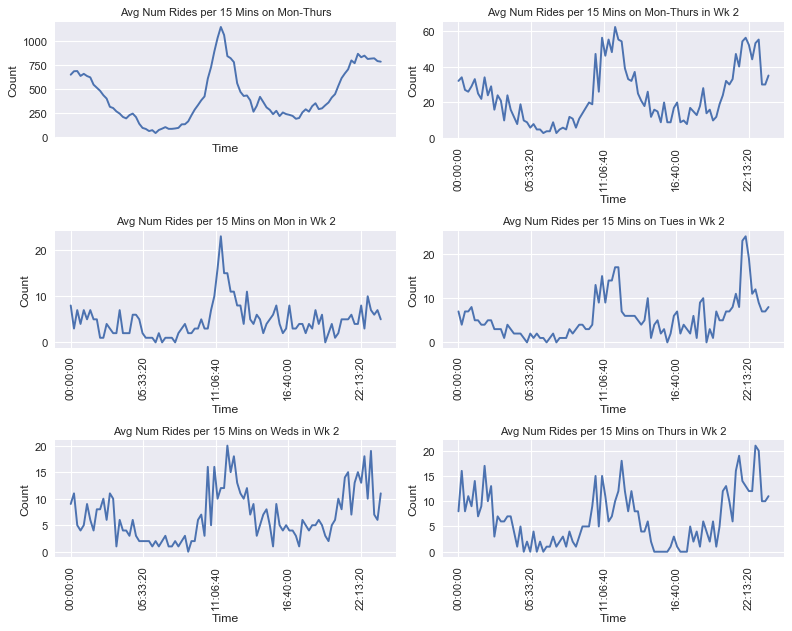

In [37]:
plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

colors = ['red', 'blue', 'green']
i = 1


ax = fig.add_subplot(3,2,1)
m_th_time =mon_thurs.groupby('time')['count'].sum()
plt.plot(m_th_time)
plt.title('Avg Num Rides per 15 Mins on Mon-Thurs', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

ax.xaxis.set_major_locator(d.MinuteLocator())   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(d.DateFormatter('%H:%M'))     #optional formatting 

plt.subplot(3,2,2)
m_th_time_2 = mon_thurs[mon_thurs.week == 2]
m_th_time_2 =m_th_time_2.groupby('time')['count'].sum()

plt.plot(m_th_time_2)
plt.title('Avg Num Rides per 15 Mins on Mon-Thurs in Wk 2', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(3,2,3)
m_th_time_m = mon_thurs[(mon_thurs.week == 2) & (mon_thurs.day_of_week == 'Monday')]
m_th_time_m =m_th_time_m.groupby('time')['count'].sum()

plt.plot(m_th_time_m)
plt.title('Avg Num Rides per 15 Mins on Mon in Wk 2', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(3,2,4)
m_th_time_t = mon_thurs[(mon_thurs.week == 2) & (mon_thurs.day_of_week == 'Tuesday')]
m_th_time_t =m_th_time_t.groupby('time')['count'].sum()

plt.plot(m_th_time_t)
plt.title('Avg Num Rides per 15 Mins on Tues in Wk 2', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(3,2,5)
m_th_time_w = mon_thurs[(mon_thurs.week == 2) & (mon_thurs.day_of_week == 'Wednesday')]
m_th_time_w =m_th_time_w.groupby('time')['count'].sum()

plt.plot(m_th_time_w)
plt.title('Avg Num Rides per 15 Mins on Weds in Wk 2', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(3,2,6)
m_th_time_th = mon_thurs[(mon_thurs.week == 2) & (mon_thurs.day_of_week == 'Thursday')]
m_th_time_th =m_th_time_th.groupby('time')['count'].sum()

plt.plot(m_th_time_th)
plt.title('Avg Num Rides per 15 Mins on Thurs in Wk 2', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')


    
plt.tight_layout()
plt.show()

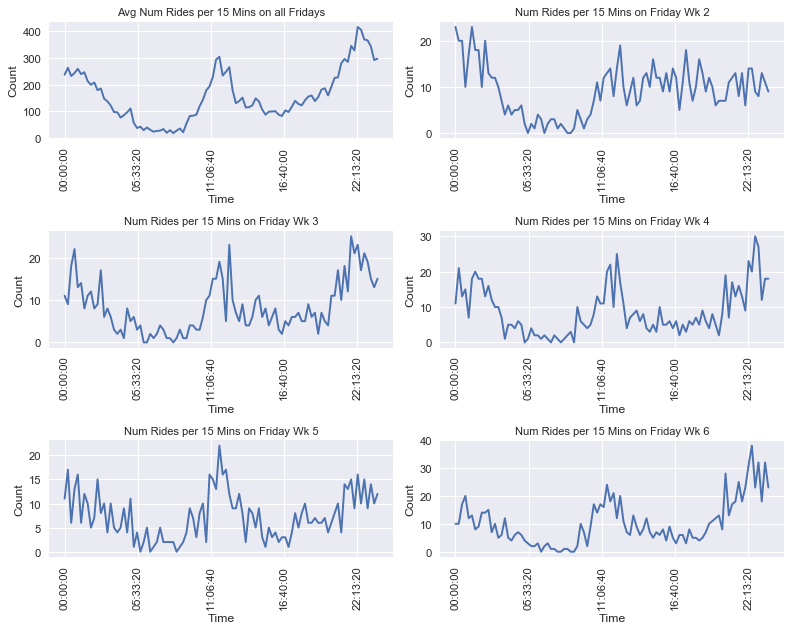

In [38]:
plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

colors = ['red', 'blue', 'green']
i = 1


plt.subplot(3,2,1)
friday =fri.groupby('time')['count'].sum()
plt.plot(friday)
plt.title('Avg Num Rides per 15 Mins on all Fridays', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(3,2,2)
friday = fri[fri.week == 2]

plt.plot(friday['time'], friday['count'])
plt.title('Num Rides per 15 Mins on Friday Wk 2', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(3,2,3)
friday = fri[fri.week == 3]

plt.plot(friday['time'], friday['count'])
plt.title('Num Rides per 15 Mins on Friday Wk 3', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(3,2,4)
friday = fri[fri.week == 4]

plt.plot(friday['time'], friday['count'])
plt.title('Num Rides per 15 Mins on Friday Wk 4', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(3,2,5)
friday = fri[fri.week == 5]

plt.plot(friday['time'], friday['count'])
plt.title('Num Rides per 15 Mins on Friday Wk 5', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(3,2,6)
friday = fri[fri.week == 6]

plt.plot(friday['time'], friday['count'])
plt.title('Num Rides per 15 Mins on Friday Wk 6', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

    
plt.tight_layout()
plt.show()

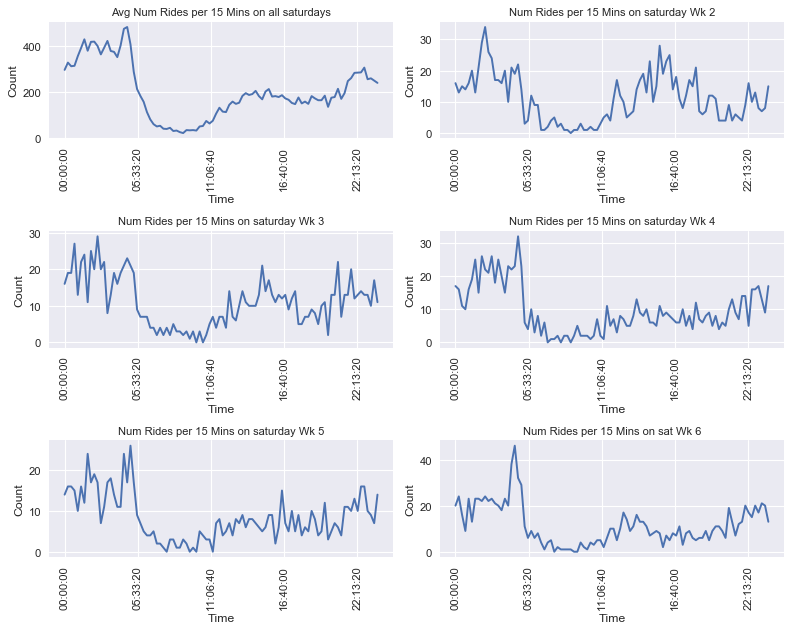

In [39]:
plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

colors = ['red', 'blue', 'green']
i = 1


plt.subplot(3,2,1)
saturday =sat.groupby('time')['count'].sum()
plt.plot(saturday)
plt.title('Avg Num Rides per 15 Mins on all saturdays', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(3,2,2)
saturday = sat[sat.week == 2]

plt.plot(saturday['time'], saturday['count'])
plt.title('Num Rides per 15 Mins on saturday Wk 2', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(3,2,3)
saturday = sat[sat.week == 3]

plt.plot(saturday['time'], saturday['count'])
plt.title('Num Rides per 15 Mins on saturday Wk 3', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(3,2,4)
saturday = sat[sat.week == 4]

plt.plot(saturday['time'], saturday['count'])
plt.title('Num Rides per 15 Mins on saturday Wk 4', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(3,2,5)
saturday = sat[sat.week == 5]

plt.plot(saturday['time'], saturday['count'])
plt.title('Num Rides per 15 Mins on saturday Wk 5', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(3,2,6)
saturday = sat[sat.week == 6]

plt.plot(saturday['time'], saturday['count'])
plt.title('Num Rides per 15 Mins on sat Wk 6', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

    
plt.tight_layout()
plt.show()

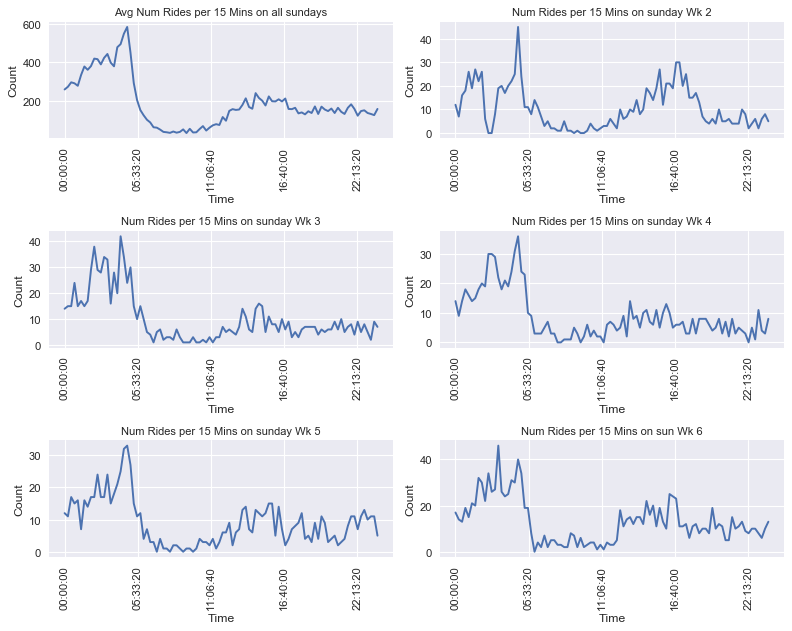

In [41]:
plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

colors = ['red', 'blue', 'green']
i = 1


plt.subplot(3,2,1)
sunday =sun.groupby('time')['count'].sum()
plt.plot(sunday)
plt.title('Avg Num Rides per 15 Mins on all sundays', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(3,2,2)
sunday = sun[sun.week == 2]

plt.plot(sunday['time'], sunday['count'])
plt.title('Num Rides per 15 Mins on sunday Wk 2', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(3,2,3)
sunday = sun[sun.week == 3]

plt.plot(sunday['time'], sunday['count'])
plt.title('Num Rides per 15 Mins on sunday Wk 3', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(3,2,4)
sunday = sun[sun.week == 4]

plt.plot(sunday['time'], sunday['count'])
plt.title('Num Rides per 15 Mins on sunday Wk 4', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(3,2,5)
sunday = sun[sun.week == 5]

plt.plot(sunday['time'], sunday['count'])
plt.title('Num Rides per 15 Mins on sunday Wk 5', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(3,2,6)
sunday = sun[sun.week == 6]

plt.plot(sunday['time'], sunday['count'])
plt.title('Num Rides per 15 Mins on sun Wk 6', fontsize = 10)
plt.xlabel('Time')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

    
plt.tight_layout()
plt.show()

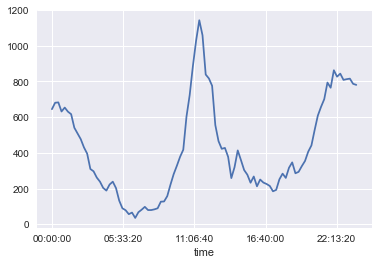

In [42]:
# average number of pickups per fifteen minute time period on
m_th_time =mon_thurs.groupby('time')['count'].sum()
plt.plot(m_th_time)
plt.show()

In [46]:
# Daily cycles 
# Weekday daily
# Weekends 

In [47]:
logins2.week[-1:]
import numpy as np

In [48]:
set(logins2.week)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [49]:
matplotlib.dates?

Object `matplotlib.dates` not found.


In [50]:
matplotlib.dates.WeekdayLocator?

Object `matplotlib.dates.WeekdayLocator` not found.


In [52]:
data = logins2[['login_time', 'count']]
data.set_index('login_time', inplace=True)

In [53]:
data.info()
data.index[1]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Data columns (total 1 columns):
count    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB


Timestamp('1970-01-01 20:15:00')

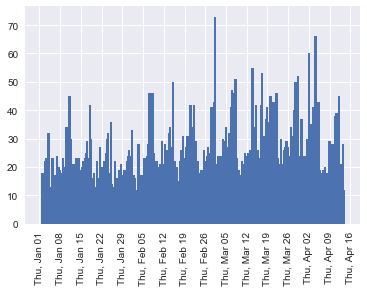

In [54]:
import pylab
import matplotlib
import matplotlib.dates

plt.clf()

fig = pylab.figure()
ax = fig.gca()

# Plotting stuff here ...
ax.bar(data.index, data['count'])

# Set major x ticks on Mondays.
ax.xaxis.set_major_locator(
    matplotlib.dates.WeekdayLocator(byweekday=[matplotlib.dates.TH], interval=1)
)
ax.xaxis.set_major_formatter(
    matplotlib.dates.DateFormatter('%a, %b %d')
)

plt.xticks(rotation='vertical')


plt.show()

In [55]:
from datetime import datetime
from datetime import date 

In [56]:
hold = logins2[(logins2.login_time > date(1969,12,31)) &
       (logins2.login_time < date(1970,2,1))]
jan = hold.drop(['date_num', 'day_of_week', 'month', 'time', 'week'], axis=1)

jan.set_index('login_time', inplace=True)

print(len(jan['count']))
print(len(jan.index))

2896
2896


AttributeError: type object 'datetime.date' has no attribute 'WeekdayLocator'

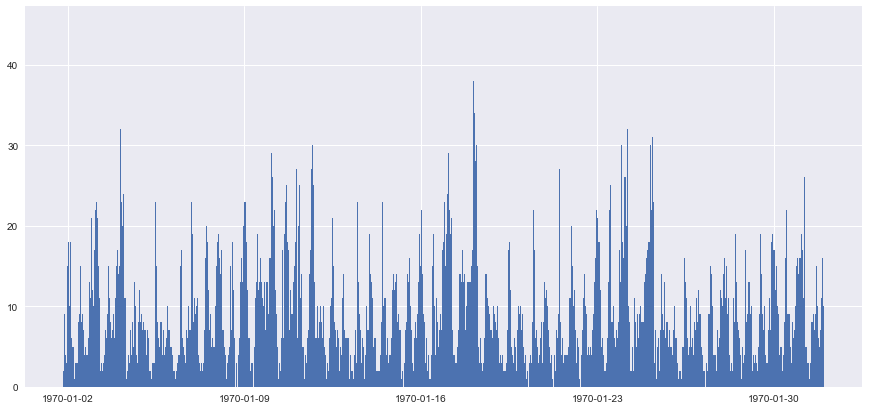

In [57]:
plt.clf()

#plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(jan.index, jan['count'], width=.025)

#set ticks every week
ax.xaxis.set_major_locator(date.WeekdayLocator(byweekday=matplotlib.dates.TH))

#set major ticks format
ax.xaxis.set_major_formatter(date.DateFormatter('%b %d'))

plt.show()

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from datetime import date
%matplotlib inline

In [ ]:
hold = logins2[(logins2.login_time > date(1969,12,31)) &
       (logins2.login_time < date(1970,1,15))]
weeks_1_2 = hold.drop(['date_num', 'day_of_week', 'month', 'time', 'week'], axis=1)

weeks_1_2.set_index('login_time', inplace=True)

print(len(weeks_1_2['count']))
print(len(weeks_1_2.index))

In [ ]:
weeks_1_2.info()

In [ ]:
weeks_1_2.head()

In [ ]:
plt.clf()

#plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(weeks_1_2.index, weeks_1_2['count'], width=.025)

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=matplotlib.dates.TH))

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.show()

In [ ]:
# Pattern is still difficult to pick up on
# Appears to be spikes in user ridership every seven days 
# Which I am predicting are weekend days
# Subsetting weeks one and two
weeks_1_2 = logins2[(logins2.login_time > date(1969,12,31)) &
       (logins2.login_time < date(1970,1,15))]


In [ ]:
plt.clf()
plt.plot_date(weeks_1_2.date_num, weeks_1_2['count'], fmt='-')
plt.tight_layout()
plt.show()

In [ ]:
hold = logins2[(logins2.login_time > date(1969,12,31)) &
       (logins2.login_time < date(1970,1,7))]
week1 = hold.drop(['date_num', 'day_of_week', 'month', 'time', 'week'], axis=1)

week1.set_index('login_time', inplace=True)

print(len(week1['count']))
print(len(week1.index))

In [ ]:
plt.clf()

#plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(week1.index, week1['count'], width=.005)

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=matplotlib.dates.TH))

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.show()

In [ ]:
# Appears t

In [ ]:
week1 = logins2[(logins2.login_time > date(1969,12,31)) &
       (logins2.login_time < date(1970,1,8))]


In [ ]:
plt.clf()
plt.plot_date(week1.login_time, week1['count'], fmt='-')
plt.tight_layout()
plt.show()

In [ ]:
days3  = logins2[(logins2.login_time > datetime.date(1969,12,31)) &
       (logins2.login_time < datetime.date(1970,1,4))]


In [ ]:
plt.clf()
plt.plot_date(days3.date_str, days3['count'], fmt='-')
plt.tight_layout()
plt.show()

In [ ]:
day1 = logins2[(logins2.login_time > datetime.date(1969,12,31)) &
       (logins2.login_time < datetime.date(1970,1,2))]

In [ ]:
plt.clf()
plt.plot_date(day1.date_str, day1['count'], fmt='-')
plt.tight_layout()
plt.show()

In [ ]:
day1

In [ ]:
day2 = logins2[(logins2.login_time < datetime.date(1970,1,3))&
    (logins2.login_time > datetime.date(1970,1,2)) 
       ]

In [ ]:
import numpy as np

In [ ]:
plt.clf()
plt.plot_date(day2.date_str, day2['count'], fmt='-')
plt.tight_layout()
plt.show()

In [ ]:
i = 1
hold = []
for e in np.arange(30):
    day = logins2[(logins2.login_time < datetime.date(1970,1,i+1))&(logins2.login_time > datetime.date(1970,1,i))]
    hold.append(day)
    i+=1
    

In [ ]:
plt.gcf().clear()

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

colors = ['red', 'blue', 'green']
i = 1
for a in np.arange(1,5):
    plt.subplot(3,2,i)
    plt.plot_date(hold[a*7].date_str, hold[a*7]['count'], fmt='-')
    plt.title('Number of rides per 15 minute period on Monday', fontsize = 10)
    plt.xlabel('Time')
    plt.xticks(rotation='vertical')
    plt.ylabel('Count')
    i+=1
    
plt.tight_layout()
plt.show()

### Part Two - Experiment and metrics design

#### One: KPI of dual city drivership program

* Prortion of Rides in or to non-home city (previously exclusive city) i.e.  proportion of rides driver based in city A gave to or within city B (rides to city b + rides within city b ) / (total rides) and vice-versa  
       
       A) Pull driver data from several time periods  (1 month, 3 months, 6 months, 1 year, 2 years) prior to reimbursement program and calculate the average proportion of non-home city rides. Pull driver data for the matching time period (assuming we have the data) after the reimbursement program occurred and calculate the average proportion of non-home city rides. Adjust the numbers for any long term growth patterns or seasonality trends. 
       B) Prior to testing statistical significance, I would compare the two proportions and check for practical significance i.e. did non-home city rides increase at all and if so did it incrase by enough for management to care about? If the answer to this question is yes, then I would conduct a hypothesis test / significance testing by calculating the two-sample z test statistic
       C) First I would look at the percentage increase in proportion of non-home city rides from before to after the reimbursement program. I would compare both the raw proportions as well as the proportions adjusted for seasonality and long term growth. I would run the two-sample z test for both the raw proportions and the adjust and determine whether any incrase was significant at a 95% confidence level or greater. 
              
       

* Total amount of reimbursements - this metric would be easier to calculate, but would not capture intra-city rides. If timestamp data was available for the fair crossings the number of non-home intra-city rides might be forecasted.
        

### Part Three - Predictive modeling

In [61]:
file=open('ultimate_data_challenge.json', 'r')

file_content=file.read()

file.close()

data=json.loads(file_content)

udc=pd.DataFrame(data)

In [62]:
udc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [63]:
udc.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [64]:
udc.fillna(0, axis=1, inplace=True)

In [65]:
udc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [66]:
udc.sort_values('last_trip_date', ascending=True)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
31425,4.31,5.0,0.0,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,False,100.0
10729,19.67,5.0,3.0,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,False,100.0
40336,5.98,5.0,5.0,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,False,100.0
34828,2.45,5.0,5.0,1.25,Astapor,2014-01-01,iPhone,2014-01-01,100.0,1,False,100.0
37295,0.77,5.0,3.0,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,False,100.0
9941,1.61,5.0,0.0,2.00,Winterfell,2014-01-01,Android,2014-01-01,100.0,1,False,100.0
13542,3.08,5.0,0.0,1.50,Winterfell,2014-01-01,iPhone,2014-01-01,100.0,1,False,100.0
39857,9.97,5.0,5.0,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,False,100.0
19976,4.74,5.0,5.0,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,False,100.0
48271,8.05,5.0,0.0,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,True,100.0


In [67]:
# Unless I missed it, I don't see a date provided for when the data
# was pulled, so I will assume the most recent ride taken was the day
# the data was pulled July 1st 2014. 


In [71]:
retained = udc[pd.to_datetime(udc.last_trip_date) > date(2014,6,1)]

In [72]:
udc['Retained'] = udc.last_trip_date.apply(lambda x: True if x > '2014-06-01' else False)

In [73]:
len(retained) / len(udc)

0.3662

In [74]:
udc.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier

In [76]:
cities = pd.get_dummies(udc.city)

In [77]:
udc = pd.concat([udc, cities],axis=1)

In [78]:
udc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
Retained                  50000 non-null bool
Astapor                   50000 non-null uint8
King's Landing            50000 non-null uint8
Winterfell                50000 non-null uint8
dtypes: bool(2), float64(6), int64(1), object(4), uint8(3)
memory usage: 4.4+ MB


In [79]:
y = udc.Retained
x = udc.drop(['Retained', 'city', 'last_trip_date','phone','signup_date'],axis=1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=42)


In [81]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

importance = list(rfc.feature_importances_)
feature = list(X_train.columns)

feature_importance = pd.DataFrame({'Feature': feature, 'Importance': importance})

print('Feature importance determined from random forest')
print(feature_importance.sort_values('Importance', ascending=False))

Feature importance determined from random forest
                   Feature  Importance
0                 avg_dist    0.314750
1     avg_rating_by_driver    0.142750
7              weekday_pct    0.125512
2     avg_rating_of_driver    0.083557
5   trips_in_first_30_days    0.078062
4                surge_pct    0.076378
3                avg_surge    0.061226
9           King's Landing    0.047867
6      ultimate_black_user    0.036455
8                  Astapor    0.017307
10              Winterfell    0.016136


In [82]:
train_score = rfc.score(X_train, y_train)
print("Train: {}".format(train_score))

test_score = rfc.score(X_test, y_test)
print("Test: {}".format(test_score))

Train: 0.9764571428571429
Test: 0.7330666666666666


missing values in average rating by and of user and in phone 

retained if they were “active” (i.e. took a trip) in the preceding 30 days.